# Stats and Public Health Part 1
**Carol Calderon
February 2023**

## Introduction

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

The dataset contains mosquito tracking data from 2008 to 2019.

**Main objective**

Basic Exploration Data Analysis and data wrangling.

**Data dictionary**

| COLUMN NAME | DESCRIPTION | NOTE       |
| ----------- | ----------- |----------- |
|Year:        |Year that the WNV test is performed| |
|Week:        |Week that the WNV test is performed| |
|Addres Block:| Address of the location of trap| |
|Block:       |Block number of address	|	|	
|Trap:        |Id of the trap|	Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.|
|Trap type:   |Type of trap| |
|Date:        |Date and time that the WNV test is performed| Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.|
|Mosquito number: |Number of mosquitoes caught in this trap |*These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.|
|WNV Present: |West Nile Virus was present in these mosquitos	string		
|Species: |Mosquito species| 
|Lat: |Latitude of trap|
|Lon: |Longitude of trap|

## Exploration data analysis steps:

This notebook follow the plan below:

1. [Import libraries and load the data](#1)
2. [Data Wrangling: Cleaning and processing for analysis](#2)
3. [Basic exploratory data analysis](#3)
4. [Advance exploratory data analysis](#4)
5. [Insights](#5)

## 1. Import libraries and load the data. <a class="anchor" id="1"></a>

In [2]:
# Import the requiered libraries

import numpy as np
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the initial dataset

raw_data=pd.read_csv('mosquito_data.csv')

In [5]:
# Visualize the first 5 rows of the dataset
raw_data.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [6]:
# Visualize the last 5 rows of the dataset
raw_data.tail()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN


In [7]:
# Visualize a sample of the dataset
raw_data.sample(5)

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
17486,2007,28,4XX W 127TH,4,T135,CDC,2007-08-01 02:08:34,10,Pip,positive,CULEX PIPIENS,NaN,NaN
7885,2013,26,6XX E 91ST PL,6,T227,GRAVID,2013-06-28 00:06:00,22,Res,negative,CULEX RESTUANS,41.728490,-87.608524
1197,2018,36,70XX W ARMITAGE AVE,70,T151,GRAVID,2018-09-06 00:09:00,3,Res,negative,CULEX RESTUANS,41.916135,-87.801093
14048,2007,36,101XX S STONY ISLAND AVE,101,T138,CDC,2007-09-12 00:09:00,42,Pip,negative,CULEX PIPIENS,41.710542,-87.584559
7507,2013,31,70XX N MOSELLE AVE,70,T008,GRAVID,2013-08-01 00:08:00,13,Pip,negative,CULEX PIPIENS,42.007998,-87.778235


**Annotation:** The dataset contains a mix of text and numeric data types with some missing values in Lat and Lon columns.

## 2. Data Wrangling: cleaning and processing for analysis <a class="anchor" id="2"></a>

In [8]:
# Get the DataFrame shape

print('The DataFrame has:', raw_data.shape,'Rows and columns')

The DataFrame has: (18495, 13) Rows and columns


### Data types

In [9]:
# Visualize the default data types set

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


**Annotation:** There are some numerical and categorical columns. Date column is set as *object* datatype, it is necessary to convert to *datetype*. The other columns seem to be set properly.

In [9]:
# Convert the 'Date' column to have a datetime datatype format.

raw_data['Date'] = pd.to_datetime(raw_data['Date'])

# Sanity check
raw_data.dtypes

Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

In [10]:
# Get the summary stats for numeric columns

raw_data.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


**Exploring more details of the Columns**

In [11]:
# Look at the list of columns
raw_data.columns

Index(['Year', 'Week', 'Address Block', 'Block', 'Trap', 'Trap type', 'Date',
       'Mosquito number', 'Mosquito ID', 'WNV Present', 'Species', 'Lat',
       'Lon'],
      dtype='object')

**Numeric columns**

In [12]:
# Characteristics of Mosquito number column

raw_data['Mosquito number'].describe()

count    18495.000000
mean        10.879913
std         13.475066
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max         50.000000
Name: Mosquito number, dtype: float64

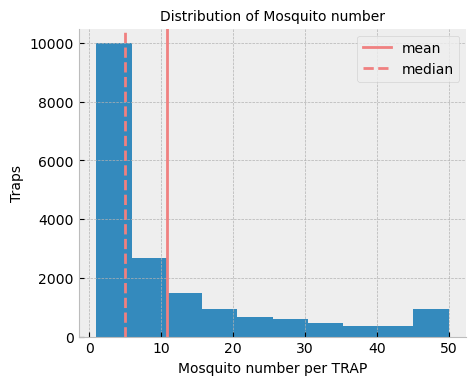

In [46]:
# Visualize the distribution of Mosquito number column

plt.figure(figsize=(5,4))
plt.hist(raw_data['Mosquito number'], bins=10)

plt.axvline(raw_data['Mosquito number'].mean(), 0, 1000, label="mean", color="lightcoral")
plt.axvline(raw_data['Mosquito number'].median(), 0, 1000, label="median", color="lightcoral", linestyle="--")

plt.xlabel('Mosquito number per TRAP', size='10')
plt.ylabel('Traps', size='10')

plt.title(f"Distribution of {'Mosquito number'}", size=10)
sns.despine()
plt.legend()
plt.show()

**Annotation:** Mosquito number contains the number of mosquitos caught in each trap, it is important to remember that if the trap had more than 50 mosquitos a new record was generated to count the next group of 50 mosquitos, then the max number of mosquitos is 50. The distribution of this columns evidenced the average number of mosquitos per observation(row) was 10.9, but 50% of the traps had less than 5 mosquitos.

In [14]:
# Characteristics of Year number column

raw_data['Year'].describe()

count    18495.000000
mean      2012.905812
std          3.725857
min       2007.000000
25%       2010.000000
50%       2013.000000
75%       2016.000000
max       2019.000000
Name: Year, dtype: float64

Year column describe when(year) the WNV test was performed

**Categoric columns**

In [15]:
# Characteristics of Trap type column

raw_data['Trap type']

0          GRAVID
1          GRAVID
2          GRAVID
3          GRAVID
4          GRAVID
           ...   
18490      GRAVID
18491      GRAVID
18492      GRAVID
18493    SENTINEL
18494      GRAVID
Name: Trap type, Length: 18495, dtype: object

The 18495 rows has a Trap type

In [16]:
# Which are the trap types:

raw_data.groupby('Trap type')['Trap type'].count()

Trap type
CDC           544
GRAVID      17741
OVI             1
SENTINEL      209
Name: Trap type, dtype: int64

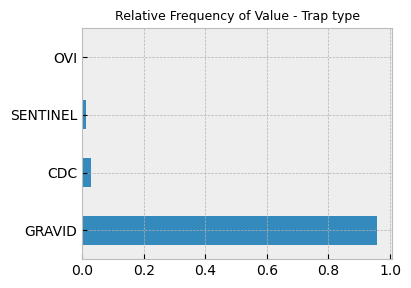

In [13]:
# Visualize the relative frequency of Trap types column

raw_data['Trap type'].value_counts(normalize=True, dropna=False).plot(kind="barh")
plt.title(f"Relative Frequency of Value - {'Trap type'}", size=9)
plt.show()


**Annotation** There are 4 types of traps: CDC, GRAVID, OVI AND SENTINEL. The highest number of traps are the GRAVID Type, roughly 95% of the total Traps.

In [18]:
# ID of trap column

raw_data.groupby(by=['Trap'])['Trap'].count()

Trap
220A       4
T001       7
T002     406
T002A     10
T002B      2
        ... 
T920       7
T921       8
T923      54
T924      39
T925      59
Name: Trap, Length: 190, dtype: int64

**Annotation** The data in the dataset contains data from 190 traps in total (including satelite traps).

In [19]:
# Mosquito species column, count the absolute values for each specie.

raw_data.groupby(by=['Species'])['Species'].count()

Species
CULEX PIPIENS        5486
CULEX RESTUANS      11866
CULEX SALINARIUS      226
CULEX TERRITANS       917
Name: Species, dtype: int64

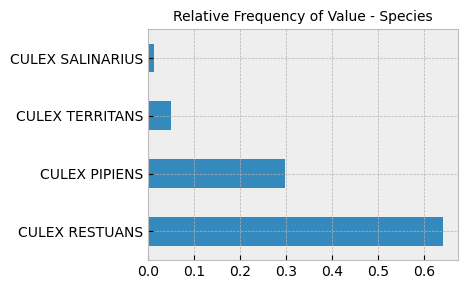

In [20]:
# Visualize the relative frequency of Mosquito species column

raw_data['Species'].value_counts(normalize=True, dropna=False).plot(kind="barh")
plt.title(f"Relative Frequency of Value - {'Species'}", size=10)
plt.show()


**Annotation** The most common specie is Culex restuans (65% of the mosquitos included in the data), followed by Culex pipiens (30%).

In [21]:
# Mosquito ID species column

raw_data.groupby(by=['Mosquito ID'])['Mosquito ID'].count()

Mosquito ID
Pip     5486
Res    11866
Sal      226
Ter      917
Name: Mosquito ID, dtype: int64

**Annotation** There are 4 species of mosquitos. *Mosquito species* column and *Mosquito ID* species column have the same information. However, *Mosquito species* column has information more clear about the name of the specie.

In [22]:
# WNV Present column

raw_data.groupby(by=['WNV Present'])['WNV Present'].count()

WNV Present
negative    14501
positive     3994
Name: WNV Present, dtype: int64

**Annotation** WNV Present column describe whether the mosquito West Nile Virus (WNV) was founded or not in the test. The categories are positive and negative.

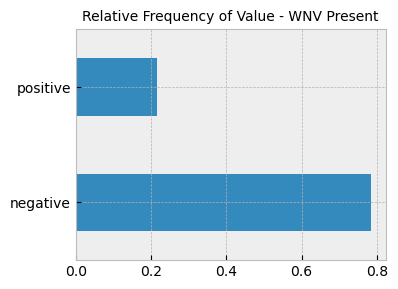

In [23]:
# Visualize the relative frequency of WNV Present column

raw_data['WNV Present'].value_counts(normalize=True, dropna=False).plot(kind="barh")
plt.title(f"Relative Frequency of Value - {'WNV Present'}", size=10)
plt.show()

**Annotation** 20% of the test reported positive to the West Nile Virus.

### Duplicates

**The columns** Date, block and Mosquito ID contain redundant information, then that columns will be eliminated. 
The new dataset will be named cleaner_data.


In [14]:
# Eliminate redundant columns and create a new dataset with the changes applied.
cleaner_data = raw_data.drop(columns=['Date','Block','Mosquito ID'])

#Sanity check
cleaner_data.head()

,Year,Week,Address Block,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,9,negative,CULEX RESTUANS,41.657069,-87.546049


In [15]:
#Sanity check
print('New number of rows and columns in the dataset is:')
cleaner_data.shape

New number of rows and columns in the dataset is:


(18495, 10)

### Missing values

In [30]:
# Look for Null values in the dataset

cleaner_data.isna().sum(axis=0)

Address Block         0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
WNV Present           0
Species               0
Lat                2924
Lon                2924
dtype: int64

**Annotation:** There are missing values in *Latitude* and *Longitude* columns

In [31]:
# Calculate the percentage of missing data over the total data

percentage_missing_data = cleaner_data.isna().sum(axis=0)/cleaner_data.shape[0]*100
percentage_missing_data

Address Block       0.000000
Trap                0.000000
Trap type           0.000000
Date                0.000000
Mosquito number     0.000000
WNV Present         0.000000
Species             0.000000
Lat                15.809678
Lon                15.809678
dtype: float64

**Annotation:** The percentage of missing values is 15.8%

In [32]:
# Look where are the locations without Latitude nor Longitud data.

cleaner_data[cleaner_data['Lat'].isna() | cleaner_data['Lon'].isna() ].groupby('Address Block').count()

,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
Address Block,,,,,,,,
100XX W OHARE,226,226,226,226,226,226,0,0
100XX W OHARE AIRPORT,2039,2039,2039,2039,2039,2039,0,0
115XX S AVENUE L,40,40,40,40,40,40,0,0
30XX S HOYNE,15,15,15,15,15,15,0,0
43XX N ASHLAND,10,10,10,10,10,10,0,0
4XX W 127TH,301,301,301,301,301,301,0,0
65XX N OAK PARK AVE,24,24,24,24,24,24,0,0
79XX S CHICAGO,136,136,136,136,136,136,0,0
81XX S ASHLAND,122,122,122,122,122,122,0,0


**Annotation:** The major number of missing values correspond to the location *100XX W OHARE AIRPORT* with 2039 rows without the data over 2924 of total rows with Latitude or Longitude missing values.

**Fix the missing data**

In [33]:
# Try to find the missing data in other rows. 
# First, from the group of data without Lat nor Lon see the Address block and Trap

cleaner_data[cleaner_data['Lat'].isna() | cleaner_data['Lon'].isna() ].groupby(['Address Block', 'Trap']).count()

Trap type  Date  Mosquito number  WNV Present  \
Address Block         Trap                                                  
100XX W OHARE         T903        129   129              129          129   
                      T904         76    76               76           76   
                      T909         21    21               21           21   
100XX W OHARE AIRPORT T900        159   159              159          159   
                      T901        108   108              108          108   
                      T902        198   198              198          198   
                      T905        203   203              203          203   
                      T906        155   155              155          155   
                      T907         20    20               20           20   
                      T908         19    19               19           19   
                      T910         70    70               70           70   
                      T911         35    35               35           35   
                      T912        272   272              272          272   
                      T913        302   302              302          302   
                      T914          3     3                3            3   
                      T915         71    71               71           71   
                      T916        180   180              180          180   
                      T917          9     9                9            9   
                      T918         68    68               68           68   
                      T920          7     7                7            7   
                      T921          8     8                8            8   
                      T923         54    54               54           54   
                      T924         39    39               39           39   
                      T925         59    59               59           59   
115XX S AVENUE L      T103         40    40               40           40   
30XX S HOYNE          T035         15    15               15           15   
43XX N ASHLAND        T145         10    10               10           10   
4XX W 127TH           T135        301   301              301          301   
65XX N OAK PARK AVE   T143         24    24               24           24   
79XX S CHICAGO        T083        136   136              136          136   
81XX S ASHLAND        T068        122   122              122          122   
98XX S AVENUE G       T100         11    11               11           11   

                            Species  Lat  Lon  
Address Block         Trap                     
100XX W OHARE         T903      129    0    0  
                      T904       76    0    0  
                      T909       21    0    0  
100XX W OHARE AIRPORT T900      159    0    0  
                      T901      108    0    0  
                      T902      198    0    0  
                      T905      203    0    0  
                      T906      155    0    0  
                      T907       20    0    0  
                      T908       19    0    0  
                      T910       70    0    0  
                      T911       35    0    0  
                      T912      272    0    0  
                      T913      302    0    0  
                      T914        3    0    0  
                      T915       71    0    0  
                      T916      180    0    0  
                      T917        9    0    0  
                      T918       68    0    0  
                      T920        7    0    0  
                      T921        8    0    0  
                      T923       54    0    0  
                      T924       39    0    0  
                      T925       59    0    0  
115XX S AVENUE L      T103       40    0    0  
30XX S HOYNE          T035       15    0    0  
43XX N ASHLAND        T145       10    0    0  
4XX W 127TH      

Now try to find the missing data looking in the complete dataset

In [34]:
# See in the complete dataset if some aleatory traps could have the data missing in other rows

cleaner_data[cleaner_data['Trap'] == 'T913'].sort_values('Lat').sample(10) #.head() / .tail()

,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
16204,100XX W OHARE AIRPORT,T913,GRAVID,2016-07-27 00:07:00,50,positive,CULEX RESTUANS,NaN,NaN
12876,100XX W OHARE AIRPORT,T913,GRAVID,2008-09-02 00:09:00,2,negative,CULEX PIPIENS,NaN,NaN
1439,100XX W OHARE AIRPORT,T913,GRAVID,2018-08-09 00:08:00,46,positive,CULEX RESTUANS,NaN,NaN
4202,100XX W OHARE AIRPORT,T913,GRAVID,2015-09-23 00:09:00,1,negative,CULEX RESTUANS,NaN,NaN
16488,100XX W OHARE AIRPORT,T913,GRAVID,2016-07-21 00:07:00,50,positive,CULEX RESTUANS,NaN,NaN
2766,100XX W OHARE AIRPORT,T913,GRAVID,2017-07-14 00:07:00,50,negative,CULEX RESTUANS,NaN,NaN
15572,100XX W OHARE AIRPORT,T913,GRAVID,2016-07-27 00:07:00,50,positive,CULEX RESTUANS,NaN,NaN
10711,100XX W OHARE AIRPORT,T913,GRAVID,2010-08-20 00:08:00,7,negative,CULEX RESTUANS,NaN,NaN
16198,100XX W OHARE AIRPORT,T913,GRAVID,2010-07-30 00:07:00,5,positive,CULEX SALINARIUS,NaN,NaN
17698,100XX W OHARE AIRPORT,T913,GRAVID,2016-07-21 00:07:00,50,positive,CULEX RESTUANS,NaN,NaN


In [35]:
# See in the complete dataset if some aleatory traps could have the data missing about Lat and Lon
cleaner_data[cleaner_data['Trap'] == 'T921'].sort_values('Lat').sample(8) #.head() / .tail()

,Address Block,Trap,Trap type,Date,Mosquito number,WNV Present,Species,Lat,Lon
7594,100XX W OHARE AIRPORT,T921,CDC,2013-07-25 00:07:00,2,negative,CULEX RESTUANS,NaN,NaN
10536,100XX W OHARE AIRPORT,T921,CDC,2010-09-02 00:09:00,1,negative,CULEX TERRITANS,NaN,NaN
7686,100XX W OHARE AIRPORT,T921,CDC,2013-07-19 00:07:00,5,negative,CULEX RESTUANS,NaN,NaN
8101,100XX W OHARE AIRPORT,T921,CDC,2013-06-07 00:06:00,4,negative,CULEX RESTUANS,NaN,NaN
7873,100XX W OHARE AIRPORT,T921,CDC,2013-07-08 00:07:00,5,negative,CULEX RESTUANS,NaN,NaN
10725,100XX W OHARE AIRPORT,T921,CDC,2010-08-20 00:08:00,5,negative,CULEX PIPIENS,NaN,NaN
10641,100XX W OHARE AIRPORT,T921,CDC,2010-08-27 00:08:00,10,negative,CULEX RESTUANS,NaN,NaN
10440,100XX W OHARE AIRPORT,T921,CDC,2010-09-13 00:09:00,2,negative,CULEX PIPIENS,NaN,NaN


**Annotation** It was not possible to infer the missing data. Next option is input the information as the locations with missing LAT and LON are known.

In [19]:
# Locations with NaN values
cleaner_data['Address Block'][cleaner_data['Lat'].isna()].value_counts()

100XX W OHARE AIRPORT    2039
4XX W 127TH               301
100XX W OHARE             226
79XX S CHICAGO            136
81XX S ASHLAND            122
115XX S AVENUE L           40
65XX N OAK PARK AVE        24
30XX S HOYNE               15
98XX S AVENUE G            11
43XX N ASHLAND             10
Name: Address Block, dtype: int64

In [22]:
# Inputing missing data
cleaner_data.loc[cleaner_data["Address Block"] == "100XX W OHARE AIRPORT", ["Lat", "Lon"]] = [41.97934, -87.90892]
cleaner_data.loc[cleaner_data["Address Block"] == "4XX W 127TH", ["Lat", "Lon"]] = [41.66329, -87.63203]
cleaner_data.loc[cleaner_data["Address Block"] == "100XX W OHARE", ["Lat", "Lon"]] = [41.97765, -87.88092]
cleaner_data.loc[cleaner_data["Address Block"] == "79XX S CHICAGO", ["Lat", "Lon"]] = [41.75440, -87.59081]
cleaner_data.loc[cleaner_data["Address Block"] == "81XX S ASHLAND", ["Lat", "Lon"]] = [41.74672, -87.66366]
cleaner_data.loc[cleaner_data["Address Block"] == "115XX S AVENUE L", ["Lat", "Lon"]] = [41.68634, -87.53644]
cleaner_data.loc[cleaner_data["Address Block"] == "65XX N OAK PARK AVE", ["Lat", "Lon"]] = [41.99911, -87.79553]
cleaner_data.loc[cleaner_data["Address Block"] == "30XX S HOYNE", ["Lat", "Lon"]] = [41.83665, -87.67775]
cleaner_data.loc[cleaner_data["Address Block"] == "98XX S AVENUE G", ["Lat", "Lon"]] = [41.71784, -87.53160]
cleaner_data.loc[cleaner_data["Address Block"] == "43XX N ASHLAND", ["Lat", "Lon"]] = [41.96001, -87.66941]

In [23]:
#Sanity check
cleaner_data.isna().sum(axis=0)

Year               0
Week               0
Address Block      0
Trap               0
Trap type          0
Mosquito number    0
WNV Present        0
Species            0
Lat                0
Lon                0
dtype: int64

Missing values were fixed.

In [24]:
# Create a new dataframe with the data clean and ready to analysis.

cleaned_data = cleaner_data

cleaned_data.head()

,Year,Week,Address Block,Trap,Trap type,Mosquito number,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,T910,GRAVID,2,negative,CULEX RESTUANS,41.979340,-87.908920
1,2019,39,52XX S KOLMAR AVE,T114,GRAVID,1,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,T028,GRAVID,2,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,T228,GRAVID,1,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,T209,GRAVID,9,negative,CULEX RESTUANS,41.657069,-87.546049


**Summary: Now the cleaned_data dataframe contains the data ready to the next steps. 
Redundant columns were eliminated and NaN values were fixed.**

## 3. Basic exploratory data analysis <a class="anchor" id="3"></a>

### Relationship between mosquito number and year

Text(0.5, 1.0, 'Mosquito numbers aggregated by year')

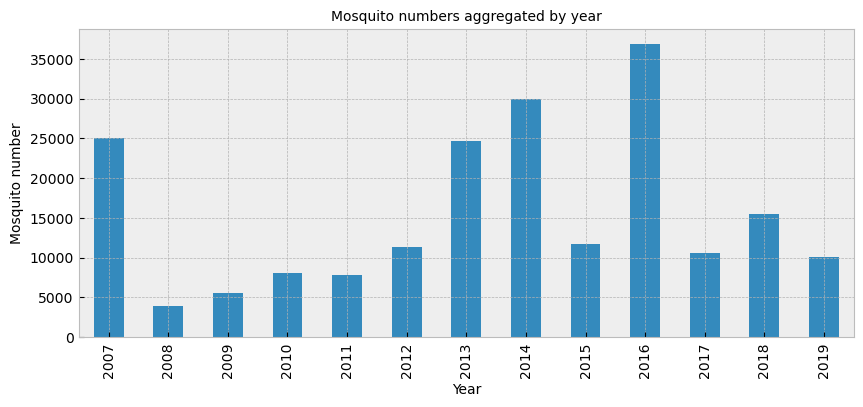

In [41]:
# Visualization to explore the relation between Mosquito number and Year

plt.figure(figsize=(10,4))
cleaned_data.groupby(cleaned_data['Year'])['Mosquito number'].agg('sum').plot.bar()
plt.ylabel('Mosquito number', size='10')
plt.xlabel('Year', size='10')
plt.title('Mosquito numbers aggregated by year', size='10')


It is observed that the number of mosquitos varied over the years. What could generate this variations? This requires further investigation.

## 4. Advanced exploratory data analysis <a class="anchor" id="4"></a>

### Relationship between mosquito species and WNV prevalence.

In [55]:
# Mapping positive cases as 1 and negative cases as 0.
cleaned_data['WNV Prevalence'] = cleaned_data['WNV Present'].replace({'positive': 1, 'negative': 0})

In [59]:
# Check
cleaned_data[['Species', 'WNV Prevalence']]

,Species,WNV Prevalence
0,CULEX RESTUANS,0
1,CULEX RESTUANS,0
2,CULEX RESTUANS,0
3,CULEX RESTUANS,0
4,CULEX RESTUANS,0
...,...,...
18490,CULEX PIPIENS,1
18491,CULEX PIPIENS,1
18492,CULEX RESTUANS,1
18493,CULEX RESTUANS,1


In [62]:
# Create a new dataframe with the specie and total of positive and negative WNV cases
virusperspecie = cleaned_data.groupby(cleaned_data['Species'])['WNV Present'].value_counts()
virusperspecie = pd.DataFrame(virusperspecie)
virusperspecie.columns = ['Count']           
virusperspecie = virusperspecie.reset_index()
virusperspecie

,Species,WNV Present,Count
0,CULEX PIPIENS,negative,4074
1,CULEX PIPIENS,positive,1412
2,CULEX RESTUANS,negative,9309
3,CULEX RESTUANS,positive,2557
4,CULEX SALINARIUS,negative,215
5,CULEX SALINARIUS,positive,11
6,CULEX TERRITANS,negative,903
7,CULEX TERRITANS,positive,14


In [63]:
# Pivot to get the number by specie
virusperspecie = virusperspecie.pivot(index='Species', columns='WNV Present', values='Count').reset_index()
virusperspecie

WNV Present,Species,negative,positive
0,CULEX PIPIENS,4074,1412
1,CULEX RESTUANS,9309,2557
2,CULEX SALINARIUS,215,11
3,CULEX TERRITANS,903,14


In [66]:
#Now calculate the prevalence

neg_species = virusperspecie['negative']
pos_species = virusperspecie['positive']
virusperspecie['%_pos'] = pos_species/(neg_species+pos_species)*100

virusperspecie.sort_values(by='%_pos', ascending = True, inplace = True)
virusperspecie


WNV Present,Species,negative,positive,pct_positive,%_pos
3,CULEX TERRITANS,903,14,1.526718,1.526718
2,CULEX SALINARIUS,215,11,4.867257,4.867257
1,CULEX RESTUANS,9309,2557,21.548963,21.548963
0,CULEX PIPIENS,4074,1412,25.738243,25.738243


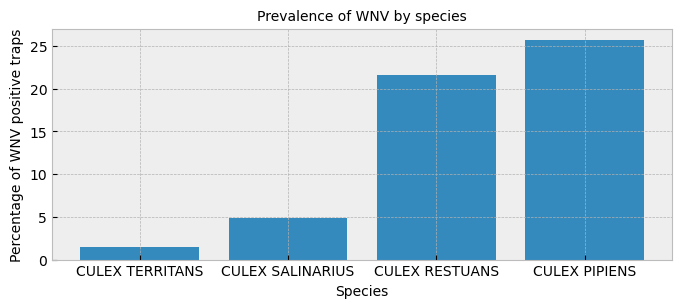

In [77]:
# Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence.

plt.figure(figsize=(8,3))
plt.bar(virusperspecie['Species'], virusperspecie['%_pos']);     # horizontal orientation easier to read
plt.xlabel('Species', size = 10)
plt.ylabel('Percentage of WNV positive traps', size = 10)
plt.title('Prevalence of WNV by species', size = 10)
plt.show()

**Annotation:** Exploring the relationship between mosquito species and WNV prevalence, the first notorious finding is that Restuans and Pipiens have similar behavior respecting the prevalence of the virus in these species, so the probability to find mosquitoes positive to WNV is higher in these species (around 5 times the probability of finding the virus in other species).

### Relationship between the number of mosquitos caught and trap type

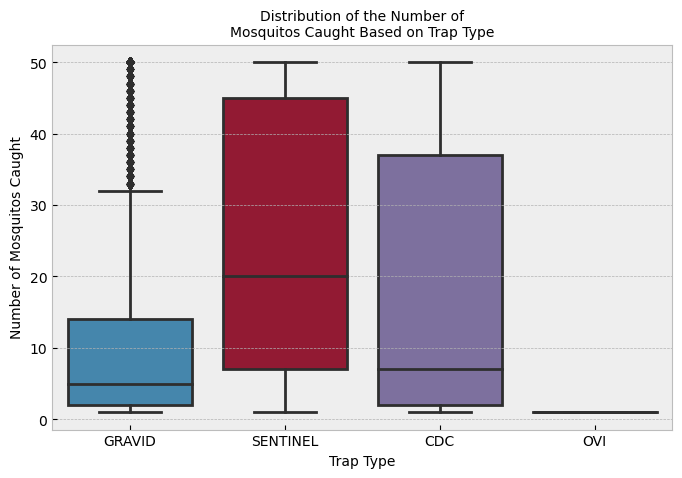

In [82]:
# Explore the relationship between the number of mosquitos caught and trap type

plt.figure(figsize=(8, 5))
sns.boxplot(x="Trap type", y="Mosquito number", data=cleaned_data)
plt.xlabel("Trap Type", fontsize=10)
plt.ylabel("Number of Mosquitos Caught", fontsize=10)
plt.title("Distribution of the Number of\nMosquitos Caught Based on Trap Type", fontsize=10)
plt.show()

**Annotation:** The 'Sentinel' trap is most effective in capturing mosquitoes, followed by 'CDC' and 'Gravid'. However, caution is advised regarding the 'Gravid' trap due to numerous outliers. It was known that OVI was not relevant as this traps didn't capture mosquitos.

### Relationship between the number of mosquitos number per specie over the time

<Figure size 2000x2000 with 0 Axes>

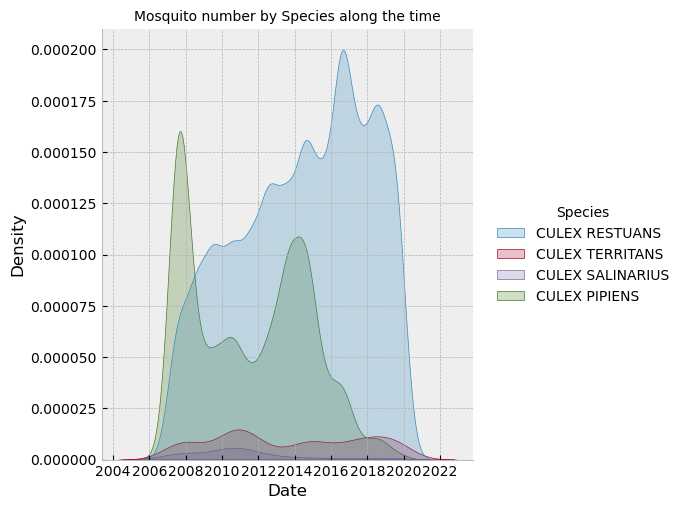

In [94]:
# Additional visualization: Relationship between the number of mosquitos number per specie over the time

data=pd.read_csv('mosquito_data.csv')
data['Date'] = pd.to_datetime(raw_data['Date'])

plt.figure(figsize=(20, 20))
sns.displot(data, x="Date", hue="Species", kind="kde", fill=True)
plt.title('Mosquito number by Species along the time', size=10)
plt.show()

**Annotation:** As was said before, the most common specie is Culex restuans: 65% of the mosquitos included in the data, followed by Culex pipiens: 30%. The last visualization evidence that Culex restuans has a higher population over the years. Culex Pipiens show the number of mosquitos that were caught was particularly higher in 2008 and 2014,but after 2014 the population started to decrease. Territians and Salinarus species showed a similarly low number of mosquitos over all the years.

## 5. Insights <a class="anchor" id="5"></a>

The dataset contains mosquito tracking data from 2008 to 2019, in total 18495 records were analyzed. The data came from 190 traps located around Chicago city. The traps were described by 4 categories, but 95% of them were GRAVID-type traps. Regarding the mosquitos that were interested in the epidemiological study the data described 4 species: Restuans, Pipiens, Territans and Salinarus, the predominant population was the Restuans species, found in 65% of the records. Finally, 20% of the records test positive for the West Nile Virus (WNV).

It was observed during all the years there were caught mosquitos, but the visualizations showed an increase in the number of mosquitoes during the years 2008, 2014 and 2016. The peaks described match with peaks in the number of Restuans and Pipiens species in some of those years. While Territians and Salinarus species showed a similarly low number of mosquitos over all the years.   

The relationship between mosquito species and WNV prevalence evidenced that Restuans and Pipiens species have similar behavior respecting the prevalence of the virus, so the probability to find mosquitoes positive for WNV is higher in those species. While the species territans and salinarius looked like they are less likely to be positive for the virus.

**END**